In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import randint
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler



In [174]:
df = pd.read_csv("./us_accidents_road_data.csv", index_col=0)
# df = df.sample(n = 10000)
df.head()


,ID,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-1,3,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-2,2,False,False,False,False,False,False,False,False,False,False,False,False,False
2,A-3,2,False,False,False,False,True,False,False,False,False,False,False,False,False
3,A-4,2,False,False,False,False,False,False,False,False,False,False,False,False,False
4,A-5,3,False,False,False,False,False,False,False,False,False,False,False,False,False


In [175]:
x = df.drop(['Severity', 'ID'], axis=1)
y = df["Severity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [176]:
# #****UNDER SAMPLING CODE SNIPPET
# # Summarize class distribution.
# print("Before undersampling: ", Counter(y_train))
# # #
# undersample = RandomUnderSampler()
# x_train, y_train = undersample.fit_resample(x_train, y_train)
# #
# # Summarize new class distribution.
# print("After undersampling: ", Counter(y_train))

In [177]:
# Summarize class distribution.
print("Before oversampling: ",Counter(y_train))
#
ros = RandomOverSampler()
x_train, y_train = ros.fit_resample(x_train, y_train)
#
# Summarize new class distribution.
print("After oversampling: ", Counter(y_train))

Before oversampling:  Counter({2: 1900101, 3: 115987, 4: 98354, 1: 19564})
After oversampling:  Counter({2: 1900101, 4: 1900101, 3: 1900101, 1: 1900101})


In [178]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy: 0.05501338326754164
Precision: [0.03477554 0.         0.05715863 0.05357143]
Recall: [0.35598706 0.         0.9263766  0.01781418]
f1 score: [0.06336145 0.         0.10767366 0.02673736]


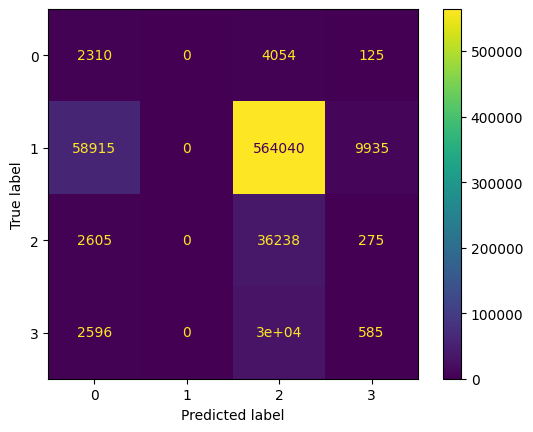

In [179]:


# Calculate model metrics.
model_accuracy = accuracy_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred, average = None)
model_recall = recall_score(y_test, y_pred, average = None)
model_f1 = f1_score(y_test, y_pred, average = None)

print("\nAccuracy:", model_accuracy)
print("Precision:", model_precision)
print("Recall:", model_recall)
print("f1 score:", model_f1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()
plt.show()


# Create a series containing feature importances from the model and feature names from the training data.

# Plot a simple bar chart
plt.show()

